In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

### 乱数から特定の関数に従うデータ

In [2]:
# y=sin(x)に従うデータ
import numpy as np
x=np.arange(-3,3,0.1)
y=np.sin(x)

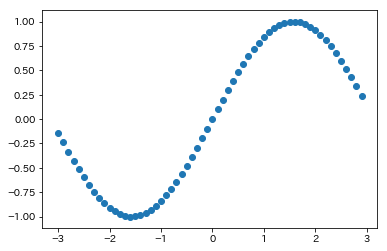

In [4]:
plt.scatter(x,y)

In [40]:
# y=sin(x)＋乱数に従うデータ
# 乱数を追加することでデータにばらつきを出す
import numpy as np
x=np.arange(-3,3,0.1)
y=np.sin(x)
sigma=0.1
# N(mu,sigma^2) := sigma * np.random.randn(...) + mu 
y+=sigma*np.random.randn(y.shape[0],1)[:,0]

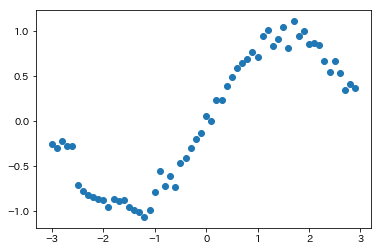

In [41]:
plt.scatter(x,y)

In [46]:
import numpy as np
x=np.random.rand(100,1) # x=(0,1)
x=x*4-2 # x=(-2,2)
y=2*x**2-3 # y=2x^2-3

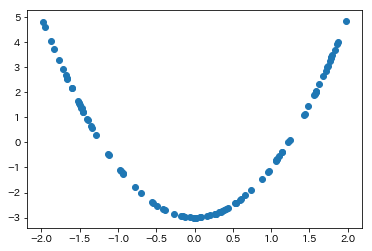

In [47]:
plt.scatter(x,y)

In [49]:
import numpy as np
x=np.random.rand(100,1) # x=(0,1)
x=x*4-2 # x=(-2,2)
y=2*x**2-3 # y=2x^2-3
sigma=1
y+=sigma*np.random.randn(y.shape[0],1)

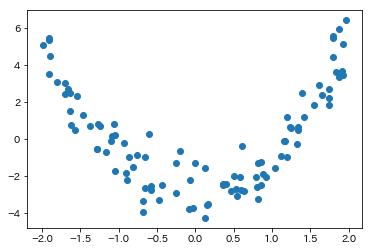

In [50]:
plt.scatter(x,y)

### 球状のデータセット

In [39]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

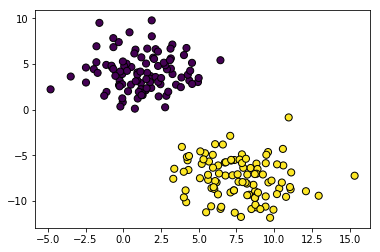

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

LightGBMサンプル

In [41]:
import lightgbm as lgb 
import numpy as np

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)

In [54]:
type(X_train)

numpy.ndarray

In [44]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [45]:
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': {'multi_logloss'},
        'num_class': 2,
        'learning_rate': 0.1,
        'num_leaves': 23,
        'min_data_in_leaf': 1,
        'num_iteration': 100,
        'verbose': 0
}

In [46]:
gbm = lgb.train(params,
            lgb_train,
            num_boost_round=50,
            valid_sets=lgb_eval,
            early_stopping_rounds=10)

[1]	valid_0's multi_logloss: 0.598139
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 0.520329
[3]	valid_0's multi_logloss: 0.455444
[4]	valid_0's multi_logloss: 0.400598
[5]	valid_0's multi_logloss: 0.353747
[6]	valid_0's multi_logloss: 0.313388
[7]	valid_0's multi_logloss: 0.278384
[8]	valid_0's multi_logloss: 0.247853
[9]	valid_0's multi_logloss: 0.221099
[10]	valid_0's multi_logloss: 0.19756
[11]	valid_0's multi_logloss: 0.176781
[12]	valid_0's multi_logloss: 0.158385
[13]	valid_0's multi_logloss: 0.142058
[14]	valid_0's multi_logloss: 0.127536
[15]	valid_0's multi_logloss: 0.114594
[16]	valid_0's multi_logloss: 0.103042
[17]	valid_0's multi_logloss: 0.0927149
[18]	valid_0's multi_logloss: 0.0834714
[19]	valid_0's multi_logloss: 0.0751883
[20]	valid_0's multi_logloss: 0.0677582
[21]	valid_0's multi_logloss: 0.0610874
[22]	valid_0's multi_logloss: 0.0550936
[23]	valid_0's multi_logloss: 0.0497041
[24]	valid_0's multi_logloss: 0.044855
[25]	

In [47]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred

array([[9.99978098e-01, 2.19017310e-05],
       [2.19017310e-05, 9.99978098e-01],
       [9.99978098e-01, 2.19017310e-05],
       [2.19017310e-05, 9.99978098e-01],
       [9.99978098e-01, 2.19017310e-05],
       [2.19017310e-05, 9.99978098e-01],
       [9.99978098e-01, 2.19017310e-05],
       [2.19017310e-05, 9.99978098e-01],
       [9.99978098e-01, 2.19017310e-05],
       [9.99978098e-01, 2.19017310e-05],
       [2.19017310e-05, 9.99978098e-01],
       [2.19017310e-05, 9.99978098e-01],
       [2.19017310e-05, 9.99978098e-01],
       [9.99978098e-01, 2.19017310e-05],
       [2.19017310e-05, 9.99978098e-01],
       [2.19017310e-05, 9.99978098e-01],
       [9.99978098e-01, 2.19017310e-05],
       [2.19017310e-05, 9.99978098e-01],
       [9.99978098e-01, 2.19017310e-05],
       [9.99978098e-01, 2.19017310e-05],
       [2.19017310e-05, 9.99978098e-01],
       [9.99978098e-01, 2.19017310e-05],
       [9.99978098e-01, 2.19017310e-05],
       [9.99978098e-01, 2.19017310e-05],
       [2.190173

In [48]:
y_pred = np.argmax(y_pred, axis=1)

In [50]:
from sklearn.metrics import f1_score

In [51]:
f1_score(y_test,y_pred)

1.0

### 分類問題用サンプルデータ

http://overlap.hatenablog.jp/entry/2015/10/08/022246

In [115]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, #サンプル数
                          n_features=10, #特徴量
                          n_informative=6, #目的変数のラベルと相関が強い特徴量
                          n_redundant=3, #Informative featureの線形結合から作られる特徴量(Redundant fearture）の数
                          n_classes=2, #分類するクラス数
                          n_clusters_per_class=2 #1クラスあたりのクラスタ数
                         )

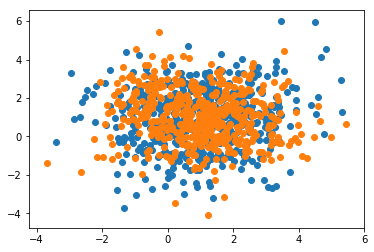

In [116]:
plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.scatter(X[:,0][y==1],X[:,1][y==1])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

C:\Users\Hiroyuki\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9333333333333333

In [28]:
lr.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0])

In [110]:
pd.DataFrame(lr.predict_proba(X_test))[0].apply(judge)

0      0
1      0
2      0
3      0
4      0
5      1
6      1
7      0
8      1
9      1
10     0
11     0
12     0
13     1
14     1
15     0
16     0
17     0
18     1
19     0
20     0
21     0
22     1
23     0
24     1
25     0
26     0
27     0
28     1
29     1
      ..
220    0
221    0
222    0
223    0
224    1
225    0
226    0
227    1
228    1
229    1
230    0
231    1
232    0
233    1
234    1
235    0
236    1
237    1
238    1
239    0
240    0
241    0
242    0
243    1
244    1
245    1
246    1
247    0
248    0
249    1
Name: 0, Length: 250, dtype: int64

In [108]:
pd.DataFrame(lr.predict_proba(X_test))[0].apply(lambda x:1 if x>=0.5 else 0)

0      0
1      0
2      0
3      0
4      0
5      1
6      1
7      0
8      1
9      1
10     0
11     0
12     0
13     1
14     1
15     0
16     0
17     0
18     1
19     0
20     0
21     0
22     1
23     0
24     1
25     0
26     0
27     0
28     1
29     1
      ..
220    0
221    0
222    0
223    0
224    1
225    0
226    0
227    1
228    1
229    1
230    0
231    1
232    0
233    1
234    1
235    0
236    1
237    1
238    1
239    0
240    0
241    0
242    0
243    1
244    1
245    1
246    1
247    0
248    0
249    1
Name: 0, Length: 250, dtype: int64

In [68]:
lr.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0])

In [122]:
lr.score(X_test,y_test)

0.732

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

C:\Users\Hiroyuki\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9866666666666667

In [123]:
rf.score(X_test,y_test)

0.88

In [131]:
y_prob_new=(lr.predict_proba(X_test)+rf.predict_proba(X_test))/2

In [135]:
y_pred_new=pd.DataFrame(pred_new)[0].apply(lambda x:0 if x>=0.5 else 1)

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
print(accuracy_score(y_test,lr.predict(X_test)))
print(accuracy_score(y_test,rf.predict(X_test)))
print(accuracy_score(y_test,y_pred_new))

0.732
0.88
0.84


### Make two interleaving half circles

In [1]:
from sklearn import datasets

In [3]:
N=300
X,y=datasets.make_moons(N,noise=0.3)

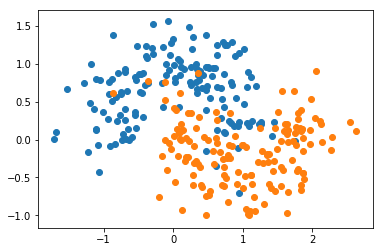

In [8]:
plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.scatter(X[:,0][y==1],X[:,1][y==1])